## Clustering

### Bibliotecas

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN, MeanShift

### Dados

In [2]:
df = pd.read_csv('../data/clean.csv', sep=',', encoding='iso-8859-1')
df.head(3)

,genero,idade,rendimento,pontuacao
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6


### Instâncias

In [48]:
scaler = StandardScaler()
pca = PCA(n_components=2)

# instancia 2 atributos (rendimento e pontuação)
dados1 = df[['rendimento','pontuacao']]
dados1_esc = scaler.fit_transform(dados1)

# intancia com todos atributos
dados2 = df.copy()
dados2_esc = scaler.fit_transform(dados2)

# instancia 2 atributos pca
df_pca = pca.fit_transform(dados2)
df_pca_esc = pca.fit_transform(dados2_esc)

## Modelos

### KMeans - dois atributos

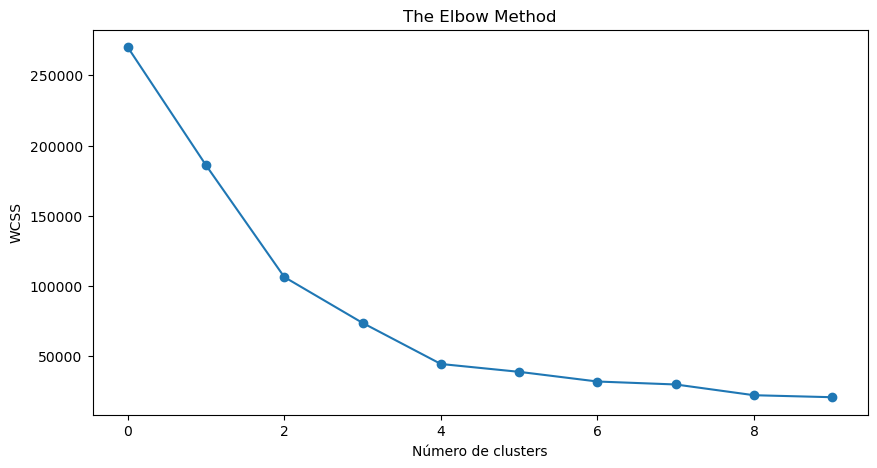

In [4]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300)
    kmeans.fit(dados1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [5]:
# modelo dois atributos
model1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0, max_iter = 300)

# ajustando dados ao modelo
model1.fit(dados1) 

# grupos
classificacao1 = model1.labels_

# centroides
centroides1 = model1.cluster_centers_

In [6]:
# df segmentado
df_model1 = pd.concat([df, pd.DataFrame(classificacao1, columns=['grupo'])], axis=1)
df_model1.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,3
1,0,21,15,81,0
2,1,20,16,6,3
3,1,23,16,77,0
4,1,31,17,40,3


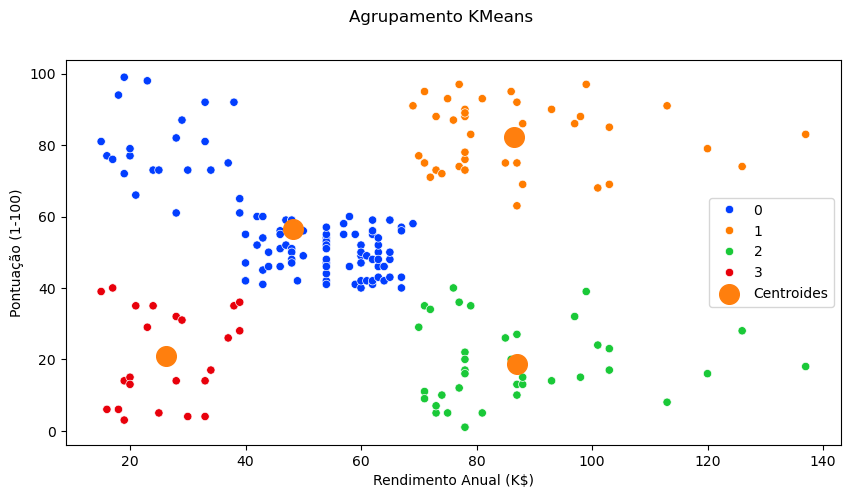

In [55]:
# plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_model1, x='rendimento', y='pontuacao', hue='grupo',palette='bright')
plt.scatter(centroides1[:,0], centroides1[:,1],s=200, label='Centroides')
plt.suptitle('Agrupamento KMeans')
plt.xlabel('Rendimento Anual (K$)')
plt.ylabel('Pontuação (1-100)')
plt.legend()
plt.show()

### Kmeans - dois atributos escalonados

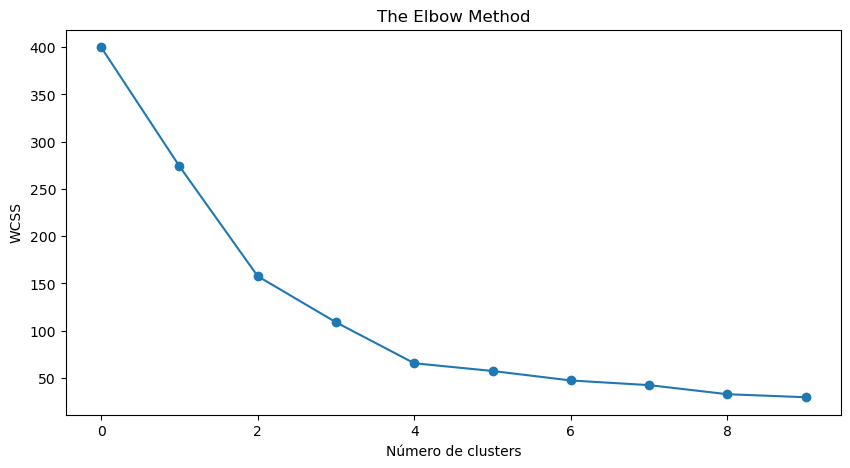

In [43]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300)
    kmeans.fit(dados1_esc)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [7]:
# modelo dois atributos com variaveis normalizadas
model2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0, max_iter = 300)

# ajustando dados ao modelo
model2.fit(dados1_esc) 

# grupos
classificacao2 = model2.labels_

# centroides
centroides2 = model2.cluster_centers_

In [8]:
df_model2 = pd.concat([df, pd.DataFrame(classificacao2, columns=['grupo'])], axis=1)
df_model2.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,3
1,0,21,15,81,0
2,1,20,16,6,3
3,1,23,16,77,0
4,1,31,17,40,3


### Kmeans - todos atributos

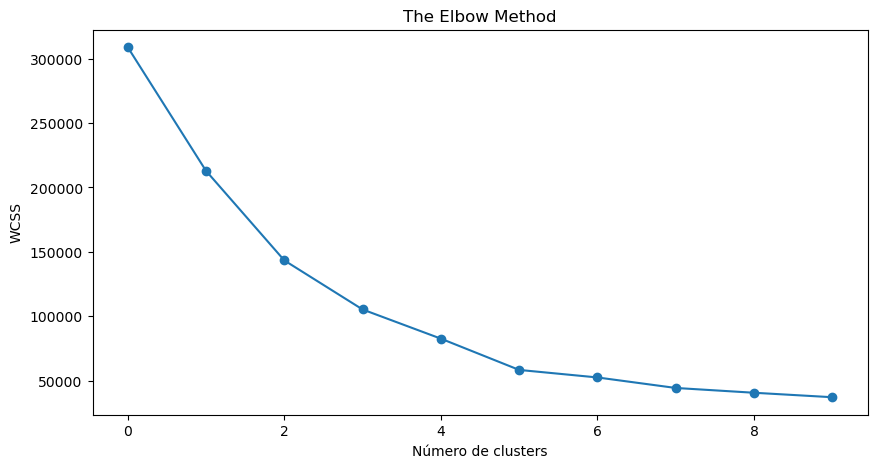

In [59]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300)
    kmeans.fit(dados2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [9]:
# modelo 
model3 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0, max_iter = 300)

# ajustando dados ao modelo
model3.fit(dados2) 

# grupos
classificacao3 = model3.labels_

# centroides
centroides3 = model3.cluster_centers_

In [11]:
# df segmentado
df_model3 = pd.concat([df, pd.DataFrame(classificacao3, columns=['grupo'])], axis=1)
df_model3.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


### KMeans - todos atributos escalonados

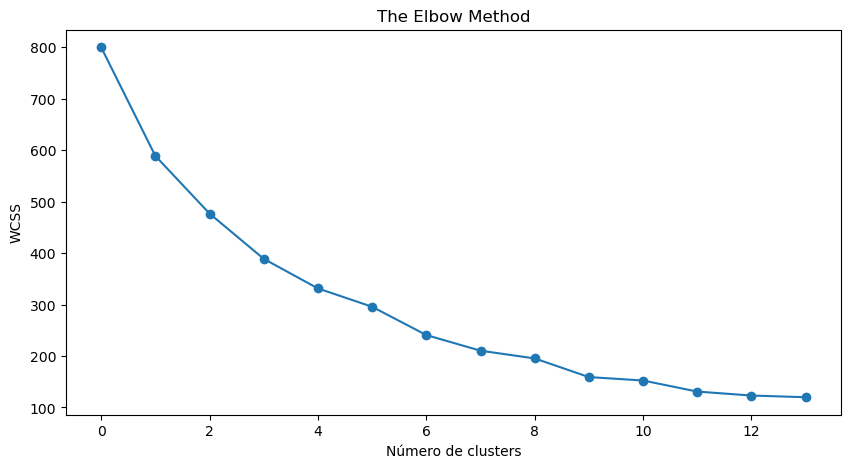

In [24]:
# elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300)
    kmeans.fit(dados2_esc)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [12]:
# modelo 
model4 = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0, max_iter = 300)

# ajustando dados ao modelo
model4.fit(dados2_esc) 

# grupos
classificacao4 = model4.labels_

# centroides
centroides4 = model4.cluster_centers_

In [13]:
# adicionando grupos ao df
df_model4 = pd.concat([df, pd.DataFrame(classificacao4, columns=['grupo'])], axis=1)
df_model4.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,7
3,1,23,16,77,4
4,1,31,17,40,4


### Kmeans com PCA

In [75]:
pca.explained_variance_ratio_.sum()

0.892096162464606

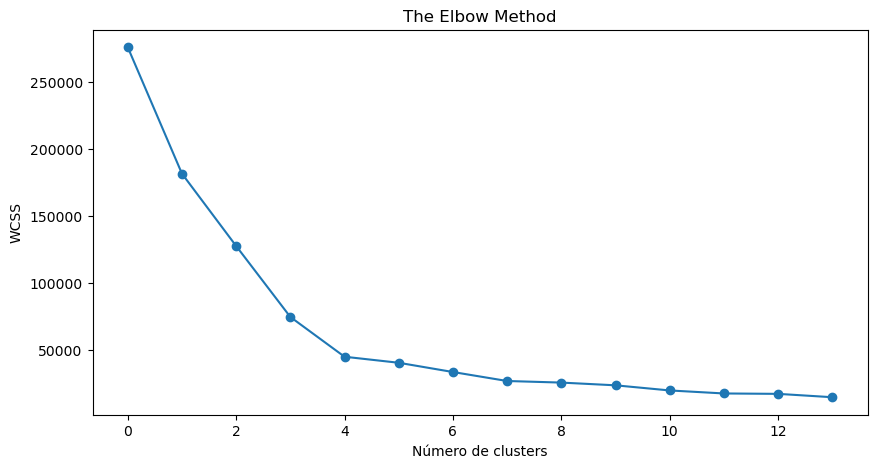

In [76]:
# elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [14]:
# modelo 
model5 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0, max_iter = 300)

# ajustando dados ao modelo
model5.fit(df_pca) 

# grupos
classificacao5 = model5.labels_

# centroides
centroides5 = model5.cluster_centers_

In [15]:
# adicionando grupos ao df
df_model5 = pd.concat([df, pd.DataFrame(classificacao5, columns=['grupo'])], axis=1)
df_model5.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3


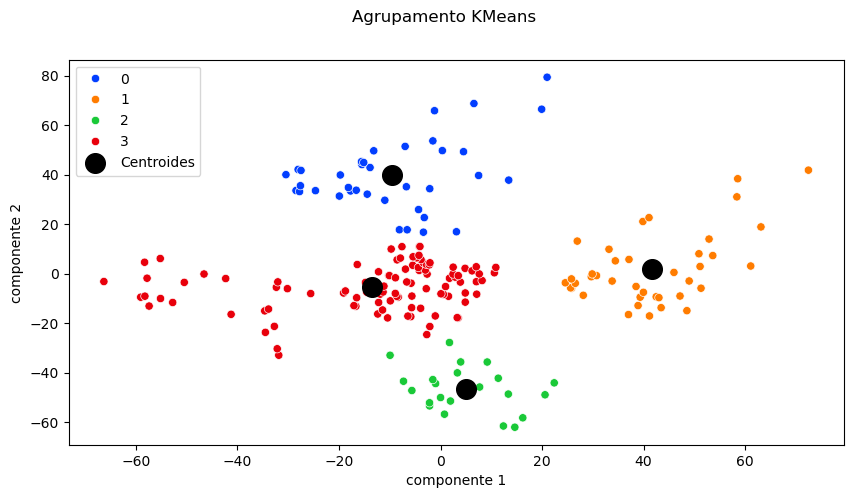

In [83]:
# plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_model5, x=df_pca[:,0], y=df_pca[:,1], hue='grupo',palette='bright')
plt.scatter(centroides3[:,0], centroides3[:,1],s=200, label='Centroides',c='black')
plt.suptitle('Agrupamento KMeans')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend()
plt.show()

### Agrupamento hierárquico

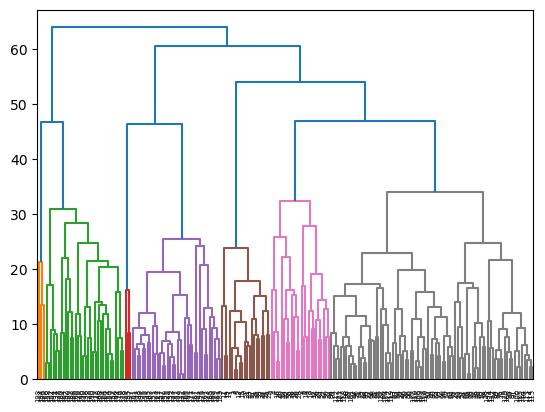

In [23]:
# dendograma
dendrograma = dendrogram(linkage(dados2, method = 'average'))

In [24]:
# modelo
hier = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage = 'average')
classificacao6 = hier.fit_predict(df_pca)

In [25]:
# grupos
set(classificacao6)

{0, 1, 2, 3, 4, 5, 6}

In [26]:
# df segmentado
df_model6 = pd.concat([df, pd.DataFrame(classificacao6, columns=['grupo'])], axis=1)
df_model6.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,0
1,0,21,15,81,3
2,1,20,16,6,0
3,1,23,16,77,3
4,1,31,17,40,0


### Agrupamento hierárquico com PCA

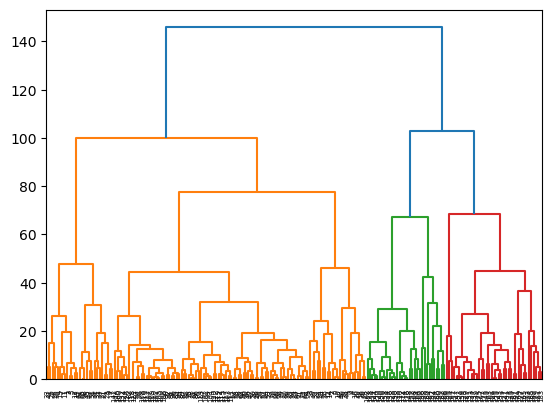

In [14]:
# dendograma
dendrograma = dendrogram(linkage(df_pca, method = 'complete'))

In [15]:
# modelo
hier = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage = 'complete')
classificacao7 = hier.fit_predict(df_pca)

In [20]:
# grupos
set(classificacao7)

{0, 1, 2}

In [18]:
# df segmentado
df_model7 = pd.concat([df, pd.DataFrame(classificacao, columns=['grupo'])], axis=1)
df_model7.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


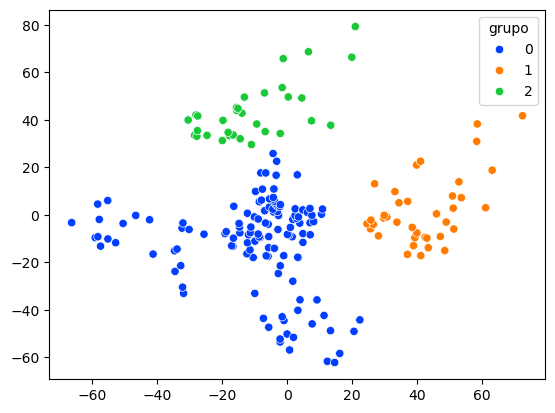

In [22]:
# plot
sns.scatterplot(data=df_model7,x=df_pca[:,0], y=df_pca[:,1], hue='grupo',palette='bright');

### DBSCAN

In [36]:
# modelo
model8 = DBSCAN(eps=0.8, min_samples=4)

# ajuste
model8.fit(dados2_esc)

# segmentacao
classificacao8 = model8.labels_
classificacao8, f'grupos e ruidos: {set(classificacao8)}'

(array([-1,  0, -1,  1,  1,  1, -1,  1,  2,  1,  2, -1,  1,  1, -1,  0,  1,
         0,  3, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
         1,  1,  1,  1,  1,  1,  1,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,
         3,  1,  3,  1,  3,  1,  3,  1,  3,  3,  3,  1,  1,  3,  3,  1,  1,
         3,  1,  3,  1,  1,  1,  3,  3,  1,  3,  1,  1,  3,  3,  3,  1,  1,
         3,  1,  1,  1,  1,  1,  3,  3,  1,  1,  3,  1,  1,  3,  3,  1,  1,
         3,  3,  3,  1,  1,  3,  3,  3,  3,  1,  1,  3,  1,  1,  1,  1,  1,
         1,  3,  1,  1,  3,  1,  1,  3,  3,  3,  3,  3,  3,  1,  1,  3,  1,
         4,  3,  3,  1,  4,  3,  1,  1,  3,  3,  3,  1,  4,  3,  3,  3,  4,
         1,  4,  1,  3,  1,  3,  1,  1,  1,  3,  1,  3,  1,  3,  1,  4,  3,
         3,  3,  3,  3,  4,  1,  3,  3,  3,  3,  4,  1,  3,  1,  4,  3,  4,
         3,  4,  1,  4,  1, -1,  1,  4,  1, -1, -1, -1, -1]),
 'grupos e ruidos: {0, 1, 2, 3, 4, -1}')

In [37]:
# df com grupos segmentados
df_model8 = pd.concat([df, pd.DataFrame(classificacao8, columns=['grupo'])], axis=1)
df_model8.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,-1
1,0,21,15,81,0
2,1,20,16,6,-1
3,1,23,16,77,1
4,1,31,17,40,1


In [83]:
# distribuicao em grupos
df_model8.grupo.value_counts()

grupo
 1    94
 3    68
 4    13
-1    12
 0     9
 2     4
Name: count, dtype: int64

In [84]:
# ruidos
df_model8.query('grupo == -1')

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,-1
2,1,20,16,6,-1
6,1,35,18,6,-1
11,1,35,19,99,-1
14,0,37,20,13,-1
19,1,35,23,98,-1
20,0,35,24,35,-1
192,0,33,113,8,-1
196,1,45,126,28,-1
197,0,32,126,74,-1


### DBSCAN com PCA

In [72]:
# modelo
model9 = DBSCAN(eps=0.32, min_samples=3)

# ajuste
model9.fit(df_pca_esc)

# segmentacao
classificacao9 = model9.labels_
classificacao9, f'grupos e ruidos: {set(classificacao9)}'

(array([ 0,  0, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  3,  1,  2,  0, -1,
         0,  2,  1,  0,  0,  3,  0,  3,  0,  0,  0,  0,  1, -1,  1, -1,  0,
         3,  1,  0, -1,  0,  1,  3,  0,  2,  4,  0, -1,  0,  4,  4,  4,  0,
        -1,  4,  2,  0,  2,  0,  2,  4,  2,  2,  0,  0,  0,  2,  0,  0,  0,
         0,  4,  2,  0,  0,  0,  2,  0,  0,  2,  0,  0,  2,  2,  2,  0,  0,
         2,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         2,  0,  2,  0,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  2,  0,  0,  0,  5,  0,
         2,  0,  5,  0, -1,  0,  0,  0,  5, -1,  2,  0,  2,  0,  2,  0,  2,
         0,  2,  0,  2,  0,  2,  0,  2,  0,  5,  0,  2,  0,  2,  0,  2, -1,
         2,  0,  2,  0,  2,  0, -1,  0, -1,  0,  2,  0, -1,  0,  2, -1,  2,
         0,  2,  0,  2,  0, -1,  0,  2,  0,  5, -1, -1, -1]),
 'grupos e ruidos: {0, 1, 2, 3, 4, 5, -1}')

In [60]:
# df segmentado
df_model9 = pd.concat([df, pd.DataFrame(classificacao9, columns=['grupo'])], axis=1)
df_model9.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,-1
3,1,23,16,77,1
4,1,31,17,40,-1


In [86]:
# distribuição em grupos
df_model9.grupo.value_counts()

grupo
 0    150
-1     24
 1      9
 3      7
 2      5
 4      5
Name: count, dtype: int64

In [87]:
# ruidos
df_model9.query('grupo == -1')

,genero,idade,rendimento,pontuacao,grupo
2,1,20,16,6,-1
4,1,31,17,40,-1
6,1,35,18,6,-1
7,1,23,18,94,-1
8,0,64,19,3,-1
9,1,30,19,72,-1
10,0,67,19,14,-1
16,1,35,21,35,-1
30,0,60,30,4,-1
32,0,53,33,4,-1


<Axes: >

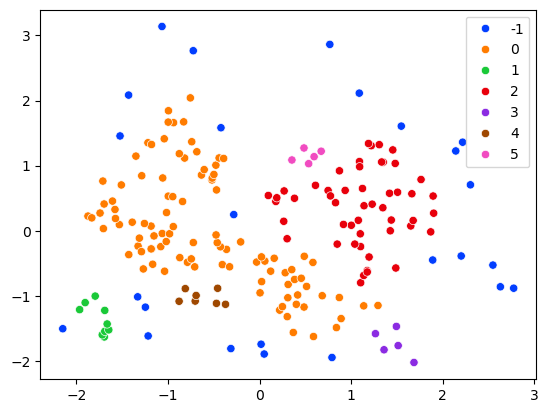

In [73]:
# plot
sns.scatterplot(data=pd.DataFrame(df_pca_esc), x=df_pca_esc[:,0], y=df_pca_esc[:,1],hue=classificacao9, palette='bright')

### Meanshift

In [93]:
# modelo
model10 = MeanShift(bandwidth=1.5, cluster_all=True) # True mantem sem ruidos

# ajuste
model10.fit(dados2_esc)

# segmentacao
classificacao10 = model10.labels_
f'grupos: {set(classificacao10)}', classificacao10

('grupos: {0, 1, 2, 3, 4}',
 array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1,
        0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
        0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
        2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 4, 1, 2, 1, 4, 1,
        0, 3, 4, 3, 0, 1, 4, 3, 0, 1, 0, 3, 4, 1, 2, 3, 0, 1, 4, 1, 0, 3,
        0, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 0, 1, 4, 1, 4, 1, 0, 3,
        4, 1, 4, 1, 0, 3, 4, 3, 0, 1, 0, 1, 4, 3, 0, 3, 4, 3, 4, 3, 4, 1,
        4, 1]))

In [94]:
# df segmentado
df_model10 = pd.concat([df, pd.DataFrame(classificacao10, columns=['grupo'])], axis=1)
df_model10.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


In [95]:
# distribuição dos grupos
df_model10.grupo.value_counts()

grupo
0    84
1    41
2    33
3    21
4    21
Name: count, dtype: int64

### Meanshift com PCA

In [96]:
# modelo
model11 = MeanShift(bandwidth=1, cluster_all=True)

# ajuste
model11.fit(df_pca_esc)

# segmentacao
classificacao11 = model11.labels_
f'grupos: {set(classificacao11)}', classificacao11

('grupos: {0, 1, 2, 3}',
 array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
        0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
        1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
        0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2,
        3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 3,
        3, 2]))

In [98]:
# df segmentado
df_model11 = pd.concat([df, pd.DataFrame(classificacao11, columns=['grupo'])], axis=1)
df_model11.head()

,genero,idade,rendimento,pontuacao,grupo
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,1


In [100]:
# distribuicao
df_model11.grupo.value_counts()

grupo
0    88
1    60
2    36
3    16
Name: count, dtype: int64

<Axes: >

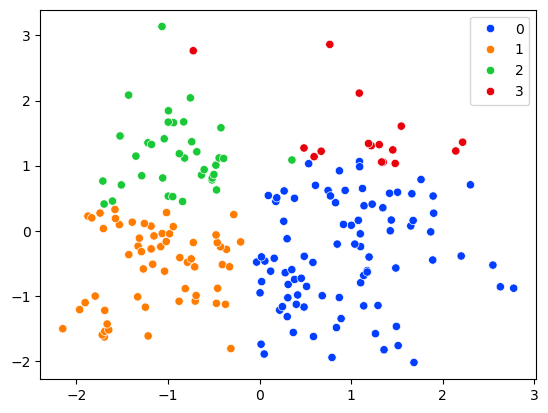

In [103]:
# plot
sns.scatterplot(data=pd.DataFrame(df_pca_esc),
               x=df_pca_esc[:,0],
               y=df_pca_esc[:,1],
               hue=classificacao11,
               palette='bright')